In [278]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from sklearn.cluster import KMeans
import seaborn as sns
import plotly.graph_objects as go

In [279]:
ODAQ_results = pd.read_csv('./ODAQ/ODAQ_listening_test/ODAQ_results.csv')
ODAQ_results_BSU1 = pd.read_csv('./ODAQ_v1_BSU/Cohort_B1_results.csv')
ODAQ_results_BSU2 = pd.read_csv('./ODAQ_v1_BSU/Cohort_B2_results.csv')

In [280]:
methods = ODAQ_results['method'].unique()
conditions = ODAQ_results['condition'].unique()
processes = ODAQ_results['process'].unique()
items = ODAQ_results['item'].unique()

print(methods)
print(conditions)
print(processes)
print(items)

['LP' 'TM' 'UN' 'SH' 'PE' 'DE']
['LP3.5' 'LP7' 'Q1' 'Q2' 'Q3' 'Q4' 'Q5' 'Ref']
['LP35' 'LP70' 'LP50' 'LP90' 'LP105' 'LP120' 'LP150' 'reference' 'TM3k'
 'TM5k' 'TM7k' 'TM9k' 'TM10.5k' 'UN3k' 'UN5k' 'UN7k' 'UN9k' 'UN10.5k'
 'SH70_MS' 'SH50_MS' 'SH30_MS' 'SH20_MS' 'SH10_MS' 'PE_4096_MS_NMR10'
 'PE_2048_MS_NMR10' 'PE_1024_MS_NMR10' 'PE_2048_MS_NMR16'
 'PE_1024_MS_NMR16' 'OpenUnmix_mid' 'TFC_TDF_U_Net_mid' 'Cocktail_mid'
 'DeepFilterNet2_mid' 'PSM_quantize_mask']
['LP_11_guitar' 'LP_23_jazz' 'LP_AmateurOnPurpose'
 'LP_CreatureFromTheBlackjackTable' 'TM_01b_trumpet' 'TM_02_violin'
 'TM_AmateurOnPurpose' 'TM_CreatureFromTheBlackjackTable'
 'UN_20c_accordion' 'UN_21_violin' 'UN_AmateurOnPurpose'
 'UN_CreatureFromTheBlackjackTable' 'SH_04_choral' 'SH_13_glockenspiel'
 'SH_AmateurOnPurpose' 'SH_CreatureFromTheBlackjackTable'
 'PE_27_castanets' 'PE_39_clapping' 'PE_AmateurOnPurpose'
 'PE_CreatureFromTheBlackjackTable' 'DE_CosmosLandromat_remix1_LD6'
 'DE_CosmosLandromat_remix3_LD3' 'DE_ElephantsD

In [281]:
# Dynamically create expert variables
unique_subjects = ODAQ_results['subject'].unique()
for i, subject in enumerate(unique_subjects, start=1):
    globals()[f"expert{i}"] = ODAQ_results[ODAQ_results['subject'] == subject]

# Dynamically create BSU1 variables
unique_subjects_BSU1 = ODAQ_results_BSU1['subject'].unique()
for i, subject in enumerate(unique_subjects_BSU1, start=1):
    globals()[f"BSU1_{i}"] = ODAQ_results_BSU1[ODAQ_results_BSU1['subject'] == subject]

# Dynamically create BSU2 variables
unique_subjects_BSU2 = ODAQ_results_BSU2['subject'].unique()
for i, subject in enumerate(unique_subjects_BSU2, start=1):
    globals()[f"BSU2_{i}"] = ODAQ_results_BSU2[ODAQ_results_BSU2['subject'] == subject]
    
print('Experts: ', unique_subjects)
print('BSU1: ', unique_subjects_BSU1)
print('BSU2: ', unique_subjects_BSU2)

Experts:  ['Subject 1: USLA08' 'Subject 2: DEID44' 'Subject 3: DEID1115'
 'Subject 4: DEID337' 'Subject 5: USLA06' 'Subject 6: DEID5'
 'Subject 7: DEID9' 'Subject 8: DEID4' 'Subject 9: USLG04'
 'Subject 10: USLA04' 'Subject 11: USLA07' 'Subject 12: DEID256'
 'Subject 13: DEID6' 'Subject 14: USLG05' 'Subject 15: USLA09'
 'Subject 16: USLG02' 'Subject 17: USLG03' 'Subject 18: DEID7'
 'Subject 19: USLA12' 'Subject 20: DEID10' 'Subject 21: DEID8'
 'Subject 22: DEID2' 'Subject 23: USLA01' 'Subject 24: USLA05'
 'Subject 25: DEID1' 'Subject 26: DEID3']
BSU1:  ['D001' 'D002' 'D003' 'D004' 'D008' 'D009' 'D010' 'D011']
BSU2:  ['D005' 'D013' 'D014' 'D015' 'D016' 'D017' 'D018' 'D019']


In [282]:
# Initialize score lists dynamically for 26 experts
for i in range(1, 27):  # Assuming 26 experts
    globals()[f"expert{i}_scores"] = []

# Initialize score lists dynamically for BSU1
for i in range(1, 9):  # Assuming 26 experts
    globals()[f"BSU1_{i}_scores"] = []

# Initialize score lists dynamically for BSU2
for i in range(1, 9):  # Assuming 26 experts
    globals()[f"BSU2_{i}_scores"] = []

# Append scores systematically
for item in items:
    for i in range(1, 27):
        expert_df = globals()[f"expert{i}"]  # Access expert data frame
        scores = expert_df[expert_df['item'] == item]['score'].values
        globals()[f"expert{i}_scores"].append(scores)

    for i in range(1, 9):
        BSU1_df = globals()[f"BSU1_{i}"]
        scores = BSU1_df[BSU1_df['item'] == item]['score'].values
        globals()[f"BSU1_{i}_scores"].append(scores)

    for i in range(1, 9):
        BSU2_df = globals()[f"BSU2_{i}"]
        scores = BSU2_df[BSU2_df['item'] == item]['score'].values
        globals()[f"BSU2_{i}_scores"].append(scores)
        

In [283]:
# create expert{}_scores_df

# Initialize expert{}_scores_df
for i in range(1, 27):
    globals()[f"expert{i}_scores_df"] = pd.DataFrame()

# Append scores systematically
for i in range(1, 27):
    globals()[f"expert{i}_scores_df"]['item'] = items
    globals()[f"expert{i}_scores_df"]['score'] = globals()[f"expert{i}_scores"]
    globals()[f"expert{i}_scores_df"]['condition'] = [list(conditions)] * len(items)

# expand the scores column such that each element in the vector is a row
for i in range(1, 27):
    globals()[f"expert{i}_scores_df"] = globals()[f"expert{i}_scores_df"].explode(['score', 'condition'])


# create BSU1_{}_scores_df

# Initialize BSU1_{}_scores_df
for i in range(1, 9):
    globals()[f"BSU1_{i}_scores_df"] = pd.DataFrame()

# Append scores systematically
for i in range(1, 9):
    globals()[f"BSU1_{i}_scores_df"]['item'] = items
    globals()[f"BSU1_{i}_scores_df"]['score'] = globals()[f"BSU1_{i}_scores"]
    globals()[f"BSU1_{i}_scores_df"]['condition'] = [list(conditions)] * len(items)

# expand the scores column such that each element in the vector is a row
for i in range(1, 9):
    globals()[f"BSU1_{i}_scores_df"] = globals()[f"BSU1_{i}_scores_df"].explode(['score', 'condition'])


# create BSU2_{}_scores_df

# Initialize BSU2_{}_scores_df
for i in range(1, 9):
    globals()[f"BSU2_{i}_scores_df"] = pd.DataFrame()

# Append scores systematically
for i in range(1, 9):
    globals()[f"BSU2_{i}_scores_df"]['item'] = items
    globals()[f"BSU2_{i}_scores_df"]['score'] = globals()[f"BSU2_{i}_scores"]
    globals()[f"BSU2_{i}_scores_df"]['condition'] = [list(conditions)] * len(items)

# expand the scores column such that each element in the vector is a row
for i in range(1, 9):
    globals()[f"BSU2_{i}_scores_df"] = globals()[f"BSU2_{i}_scores_df"].explode(['score', 'condition'])

# K-Means for Ranking Experts and Students

In [284]:
# K-means clustering for expert scores for ranking

for i in range(1, 27):
    # Dynamically access each expert's DataFrame
    df = globals()[f"expert{i}_scores_df"]
    
    # Apply K-means clustering (k=8)
    kmeans = KMeans(n_clusters=8, random_state=0).fit(df['score'].values.reshape(-1, 1))
    
    # Assign initial cluster labels
    df['cluster'] = kmeans.labels_
    
    # Compute mean score for each cluster
    cluster_means = df.groupby('cluster')['score'].mean()
    
    # Rank clusters by mean score, assigning new labels from 1 to 8
    cluster_rank = {old_label: new_label for new_label, old_label in enumerate(np.argsort(cluster_means.values), start=1)}
    
    # Reassign cluster labels based on ranking
    df['cluster'] = df['cluster'].map(cluster_rank)
    
    # Store back the updated DataFrame
    globals()[f"expert{i}_scores_df"] = df


# K-means clustering for BSU1 scores for ranking

for i in range(1, 9):
    # Dynamically access each expert's DataFrame
    df = globals()[f"BSU1_{i}_scores_df"]
    
    # Apply K-means clustering (k=8)
    kmeans = KMeans(n_clusters=8, random_state=0).fit(df['score'].values.reshape(-1, 1))
    
    # Assign initial cluster labels
    df['cluster'] = kmeans.labels_
    
    # Compute mean score for each cluster
    cluster_means = df.groupby('cluster')['score'].mean()
    
    # Rank clusters by mean score, assigning new labels from 1 to 8
    cluster_rank = {old_label: new_label for new_label, old_label in enumerate(np.argsort(cluster_means.values), start=1)}
    
    # Reassign cluster labels based on ranking
    df['cluster'] = df['cluster'].map(cluster_rank)
    
    # Store back the updated DataFrame
    globals()[f"BSU1_{i}_scores_df"] = df


# K-means clustering for BSU2 scores for ranking

for i in range(1, 9):
    # Dynamically access each expert's DataFrame
    df = globals()[f"BSU2_{i}_scores_df"]
    
    # Apply K-means clustering (k=8)
    kmeans = KMeans(n_clusters=8, random_state=0).fit(df['score'].values.reshape(-1, 1))
    
    # Assign initial cluster labels
    df['cluster'] = kmeans.labels_
    
    # Compute mean score for each cluster
    cluster_means = df.groupby('cluster')['score'].mean()
    
    # Rank clusters by mean score, assigning new labels from 1 to 8
    cluster_rank = {old_label: new_label for new_label, old_label in enumerate(np.argsort(cluster_means.values), start=1)}
    
    # Reassign cluster labels based on ranking
    df['cluster'] = df['cluster'].map(cluster_rank)
    
    # Store back the updated DataFrame
    globals()[f"BSU2_{i}_scores_df"] = df


In [285]:
# Define distinct colors for the 8 clusters
cluster_colors = [
    "#636EFA", "#EF553B", "#00CC96", "#AB63FA", "#FFA15A", 
    "#19D3F3", "#FF6692", "#B6E880"
]

# Create a colormap from the cluster colors
cmap = mcolors.ListedColormap(cluster_colors)

/var/folders/d3/99lvl9fd1673ngz9966pvq100000gn/T/ipykernel_52355/1551089044.py:20: UserWarning:

Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.



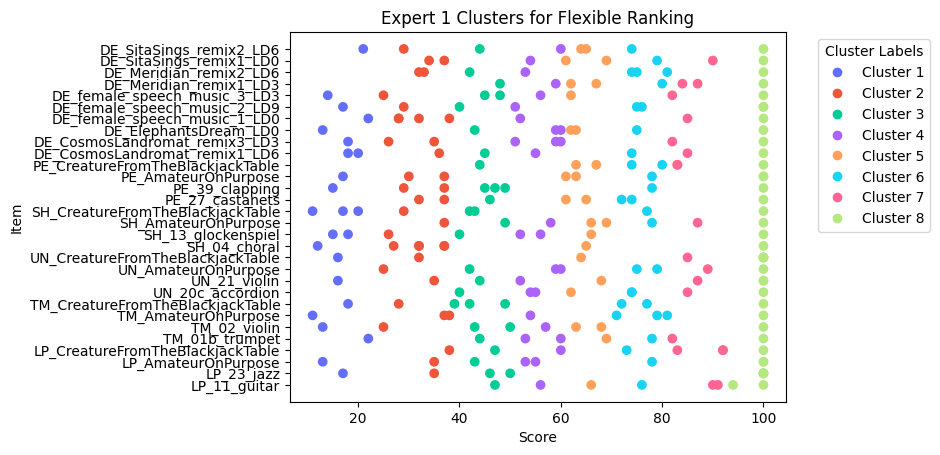

In [286]:
# Visualize the clusters for expert 1

scatter = plt.scatter(expert1_scores_df['score'], 
                      expert1_scores_df['item'], 
                      c=expert1_scores_df['cluster'], 
                      cmap=cmap)

# Labels and title
plt.xlabel('Score')
plt.ylabel('Item')
plt.title('Expert 1 Clusters for Flexible Ranking')

# Create legend and move it outside
legend = plt.legend(handles=scatter.legend_elements()[0], 
                    labels=[f'Cluster {i+1}' for i in range(8)], 
                    title='Cluster Labels',
                    bbox_to_anchor=(1.05, 1), loc='upper left')  # Moves legend outside

# Adjust layout to prevent cutting off the legend
plt.tight_layout(rect=[1, 0, 0.8, 1])

plt.show()

/var/folders/d3/99lvl9fd1673ngz9966pvq100000gn/T/ipykernel_52355/3972007069.py:20: UserWarning:

Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.



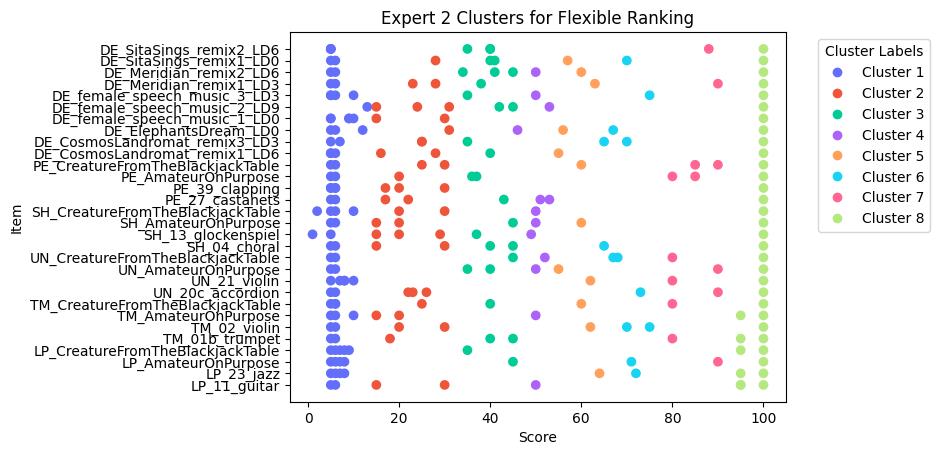

In [287]:
# Visualize the clusters for expert 2

scatter = plt.scatter(expert2_scores_df['score'], 
                       expert2_scores_df['item'], 
                       c=expert2_scores_df['cluster'],
                       cmap=cmap)

# Labels and title
plt.xlabel('Score')
plt.ylabel('Item')
plt.title('Expert 2 Clusters for Flexible Ranking')

# Create legend and move it outside
legend = plt.legend(handles=scatter.legend_elements()[0], 
                    labels=[f'Cluster {i+1}' for i in range(8)], 
                    title='Cluster Labels',
                    bbox_to_anchor=(1.05, 1), loc='upper left')  # Moves legend outside

# Adjust layout to prevent cutting off the legend
plt.tight_layout(rect=[1, 0, 0.8, 1])

plt.show()

/var/folders/d3/99lvl9fd1673ngz9966pvq100000gn/T/ipykernel_52355/3503376670.py:20: UserWarning:

Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.



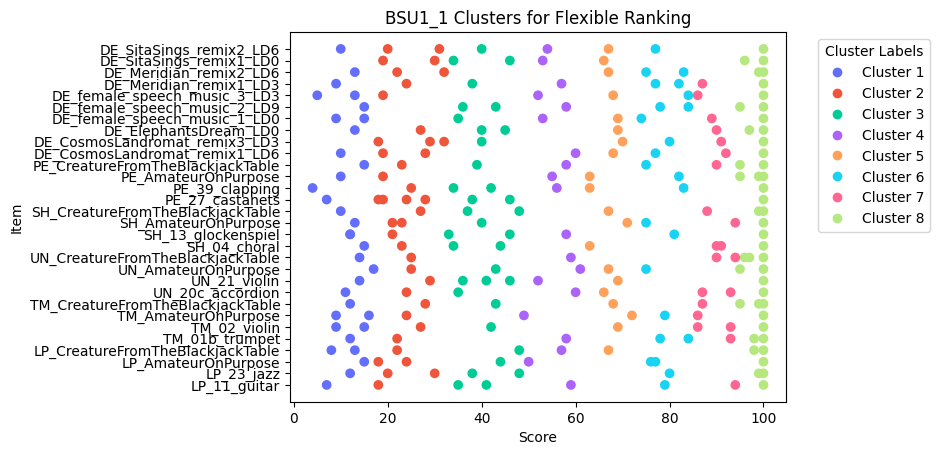

In [288]:
# Visualize the clusters for BSU1_1

scatter = plt.scatter(BSU1_1_scores_df['score'],
                      BSU1_1_scores_df['item'],
                      c=BSU1_1_scores_df['cluster'],
                      cmap=cmap)

# Labels and title
plt.xlabel('Score')
plt.ylabel('Item')
plt.title('BSU1_1 Clusters for Flexible Ranking')

# Create legend and move it outside
legend = plt.legend(handles=scatter.legend_elements()[0],
                    labels=[f'Cluster {i+1}' for i in range(8)],
                    title='Cluster Labels',
                    bbox_to_anchor=(1.05, 1), loc='upper left')  # Moves legend outside

# Adjust layout to prevent cutting off the legend
plt.tight_layout(rect=[1, 0, 0.8, 1])

plt.show()

/var/folders/d3/99lvl9fd1673ngz9966pvq100000gn/T/ipykernel_52355/2442698750.py:20: UserWarning:

Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.



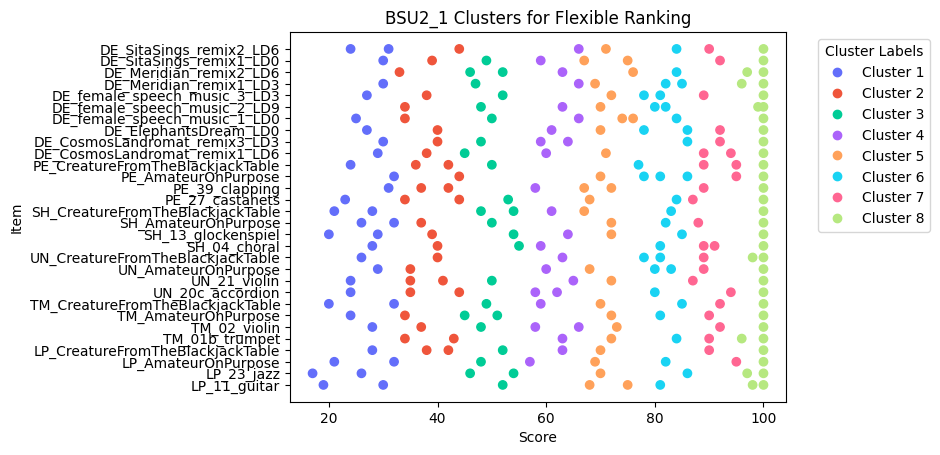

In [289]:
# Visualize the clusters for BSU2_1

scatter = plt.scatter(BSU2_1_scores_df['score'],
                      BSU2_1_scores_df['item'],
                      c=BSU2_1_scores_df['cluster'],
                      cmap=cmap)

# Labels and title
plt.xlabel('Score')
plt.ylabel('Item')
plt.title('BSU2_1 Clusters for Flexible Ranking')

# Create legend and move it outside
legend = plt.legend(handles=scatter.legend_elements()[0],
                    labels=[f'Cluster {i+1}' for i in range(8)],
                    title='Cluster Labels',
                    bbox_to_anchor=(1.05, 1), loc='upper left')  # Moves legend outside

# Adjust layout to prevent cutting off the legend
plt.tight_layout(rect=[1, 0, 0.8, 1])

plt.show()

In [290]:
# print how many items are in each cluster for each expert

for i in range(1, 2):
    df = globals()[f"expert{i}_scores_df"]
    cluster_counts = df.groupby('cluster')['item'].count()
    print(f"Expert {i} Cluster Counts:")
    print(cluster_counts)
    print("Total Items (should be 240):")
    print(sum(cluster_counts))
    print()

Expert 1 Cluster Counts:
cluster
1    24
2    38
3    31
4    29
5    26
6    31
7    20
8    41
Name: item, dtype: int64
Total Items (should be 240):
240



# Heatmap & Hierarchical Clustering

In [291]:
# Convert back to simple dataframe

for i in range(1, 27):
    df = globals()[f"expert{i}_scores_df"]
    
    # Group by 'item' and aggregate the lists back
    df = df.groupby('item').agg({
        'score': list,
        'condition': list,
        'cluster': list
    }).reset_index()

    # Rename 'cluster' to 'rankings'
    df = df.rename(columns={'cluster': 'rankings'})
    
    # Store the updated DataFrame back
    globals()[f"expert{i}_scores_df"] = df

for i in range(1, 9):
    df = globals()[f"BSU1_{i}_scores_df"]
    
    # Group by 'item' and aggregate the lists back
    df = df.groupby('item').agg({
        'score': list,
        'condition': list,
        'cluster': list
    }).reset_index()

    # Rename 'cluster' to 'rankings'
    df = df.rename(columns={'cluster': 'rankings'})
    
    # Store the updated DataFrame back
    globals()[f"BSU1_{i}_scores_df"] = df

for i in range(1, 9):
    df = globals()[f"BSU2_{i}_scores_df"]
    
    # Group by 'item' and aggregate the lists back
    df = df.groupby('item').agg({
        'score': list,
        'condition': list,
        'cluster': list
    }).reset_index()

    # Rename 'cluster' to 'rankings'
    df = df.rename(columns={'cluster': 'rankings'})
    
    # Store the updated DataFrame back
    globals()[f"BSU2_{i}_scores_df"] = df

In [292]:
# Extract all the 'rankings' column value for each expert and create a 30x8 matrix for each expert. Name as expert1_rankings_kmeans_based, expert2_rankings_kmeans_based, etc.

for i in range(1, 27):
    df = globals()[f"expert{i}_scores_df"]
    
    # Extract the 'cluster' values as a 30x8 matrix
    rankings_matrix = np.array(df['rankings'].tolist())  # Convert list of lists to array
    
    # Store as a variable dynamically
    globals()[f"expert{i}_rankings_kmeans_based"] = rankings_matrix

for i in range(1, 9):
    df = globals()[f"BSU1_{i}_scores_df"]
    
    # Extract the 'cluster' values as a 30x8 matrix
    rankings_matrix = np.array(df['rankings'].tolist())  # Convert list of lists to array
    
    # Store as a variable dynamically
    globals()[f"BSU1_{i}_rankings_kmeans_based"] = rankings_matrix

for i in range(1, 9):
    df = globals()[f"BSU2_{i}_scores_df"]
    
    # Extract the 'cluster' values as a 30x8 matrix
    rankings_matrix = np.array(df['rankings'].tolist())  # Convert list of lists to array
    
    # Store as a variable dynamically
    globals()[f"BSU2_{i}_rankings_kmeans_based"] = rankings_matrix

In [293]:
# Perfect ranking
perfect_ranking = np.array([1, 2, 3, 4, 5, 6, 7, 8])

In [294]:
# Define a distance function (Euclidean distance)
def compute_distance(vec1, vec2):
    return np.linalg.norm(vec1 - vec2)  # Euclidean distance

For $\mathbf{v}_1 = [v_{1,1}, v_{1,2}, \ldots, v_{1,n}]$ and $\mathbf{v}_2 = [v_{2,1}, v_{2,2}, \ldots, v_{2,n}]$, with $n=8$, we compute the euclidean distance between them as follows:
$$d(\mathbf{v}_1, \mathbf{v}_2) = \sqrt{\sum_{i=1}^{n} (v_{1,i} - v_{2,i})^2}$$

In [295]:
# Initialize a 26x30 matrix to store distances
distance_matrix_experts = np.zeros((26, 30))

# Compute distances systematically
for i in range(1, 27):  # 26 experts
    expert_rankings = globals()[f"expert{i}_rankings_kmeans_based"]  # Get expert rankings (30 vectors)
    
    for j in range(30):  # 30 ranking vectors per expert
        distance_matrix_experts[i-1, j] = compute_distance(expert_rankings[j], perfect_ranking)

distance_matrix_experts_df = pd.DataFrame(distance_matrix_experts, columns=items)

# Increment index by 1 for distance_matrix_df

distance_matrix_experts_df.index += 1

# --------------------------------------------------------------------------------------------------------

# Initialize a 34x30 matrix to store distances for Experts + BSU1
distance_matrix_experts_BSU1 = np.zeros((34, 30))

# Compute distances systematically
for i in range(1, 27):  # 26 experts
    expert_rankings = globals()[f"expert{i}_rankings_kmeans_based"]  # Get expert rankings (30 vectors)
    
    for j in range(30):  # 30 ranking vectors per expert
        distance_matrix_experts_BSU1[i-1, j] = compute_distance(expert_rankings[j], perfect_ranking)

for i in range(1, 9):  # 8 BSU1 students
    BSU1_rankings = globals()[f"BSU1_{i}_rankings_kmeans_based"]  # Get BSU1 rankings (30 vectors)
    
    for j in range(30):  # 30 ranking vectors per BSU1 student
        distance_matrix_experts_BSU1[26+i-1, j] = compute_distance(BSU1_rankings[j], perfect_ranking)

distance_matrix_experts_BSU1_df = pd.DataFrame(distance_matrix_experts_BSU1, columns=items)

# Increment index by 1 for distance_matrix_experts_BSU1_df
distance_matrix_experts_BSU1_df.index += 1

# --------------------------------------------------------------------------------------------------------

# Initialize a 42x30 matrix to store distances for Experts + BSU1 + BSU2
distance_matrix_experts_BSU1_BSU2 = np.zeros((42, 30))

# Compute distances systematically
for i in range(1, 27):  # 26 experts
    expert_rankings = globals()[f"expert{i}_rankings_kmeans_based"]  # Get expert rankings (30 vectors)
    
    for j in range(30):  # 30 ranking vectors per expert
        distance_matrix_experts_BSU1_BSU2[i-1, j] = compute_distance(expert_rankings[j], perfect_ranking)

for i in range(1, 9):  # 8 BSU1 students
    BSU1_rankings = globals()[f"BSU1_{i}_rankings_kmeans_based"]  # Get BSU1 rankings (30 vectors)
    
    for j in range(30):  # 30 ranking vectors per BSU1 student
        distance_matrix_experts_BSU1_BSU2[26+i-1, j] = compute_distance(BSU1_rankings[j], perfect_ranking)

for i in range(1, 9):  # 8 BSU2 students
    BSU2_rankings = globals()[f"BSU2_{i}_rankings_kmeans_based"]  # Get BSU2 rankings (30 vectors)

    for j in range(30):  # 30 ranking vectors per BSU2 student
        distance_matrix_experts_BSU1_BSU2[34+i-1, j] = compute_distance(BSU2_rankings[j], perfect_ranking)

distance_matrix_experts_BSU1_BSU2_df = pd.DataFrame(distance_matrix_experts_BSU1_BSU2, columns=items)

# Increment index by 1 for distance_matrix_experts_BSU1_BSU2_df
distance_matrix_experts_BSU1_BSU2_df.index += 1

In [296]:
distance_matrix_experts_df

,LP_11_guitar,LP_23_jazz,LP_AmateurOnPurpose,LP_CreatureFromTheBlackjackTable,TM_01b_trumpet,TM_02_violin,TM_AmateurOnPurpose,TM_CreatureFromTheBlackjackTable,UN_20c_accordion,UN_21_violin,...,DE_CosmosLandromat_remix1_LD6,DE_CosmosLandromat_remix3_LD3,DE_ElephantsDream_LD0,DE_female_speech_music_1_LD0,DE_female_speech_music_2_LD9,DE_female_speech_music_3_LD3,DE_Meridian_remix1_LD3,DE_Meridian_remix2_LD6,DE_SitaSings_remix1_LD0,DE_SitaSings_remix2_LD6
1,2.828427,4.242641,4.000000,5.916080,4.582576,2.645751,4.000000,5.830952,2.828427,2.645751,...,2.449490,5.744563,2.449490,3.605551,1.732051,3.741657,5.196152,4.242641,4.242641,5.196152
2,5.567764,3.316625,4.000000,4.795832,6.782330,4.795832,4.358899,8.774964,5.385165,6.244998,...,4.472136,7.071068,3.000000,3.605551,4.795832,3.741657,3.872983,5.567764,2.449490,2.828427
3,6.244998,3.000000,4.898979,5.916080,3.316625,3.872983,2.000000,6.403124,4.242641,4.795832,...,3.162278,3.162278,2.645751,3.872983,2.449490,3.000000,3.872983,4.358899,2.645751,3.464102
4,5.656854,2.236068,4.242641,4.690416,2.449490,5.385165,3.464102,4.898979,4.582576,4.123106,...,7.483315,4.690416,3.162278,3.741657,3.872983,3.316625,2.236068,6.082763,3.872983,3.741657
5,4.690416,5.099020,4.898979,3.872983,3.872983,4.898979,4.242641,4.690416,2.449490,6.928203,...,4.123106,6.480741,3.316625,4.582576,3.316625,4.898979,4.000000,5.916080,4.582576,5.830952
6,3.316625,2.645751,4.472136,2.828427,4.242641,5.477226,4.472136,5.291503,2.236068,7.348469,...,2.645751,4.000000,6.164414,5.196152,4.795832,4.472136,4.000000,1.414214,5.196152,6.480741
7,6.480741,4.000000,4.795832,6.557439,3.464102,6.633250,4.898979,5.567764,4.358899,5.656854,...,4.358899,5.196152,2.000000,5.656854,2.828427,4.472136,4.000000,4.690416,2.645751,2.828427
8,7.483315,7.416198,5.744563,5.196152,4.358899,6.000000,6.708204,7.745967,4.795832,6.244998,...,5.099020,4.582576,4.795832,7.615773,5.196152,5.656854,4.000000,5.916080,5.291503,4.000000
9,5.656854,4.123106,4.795832,5.385165,6.928203,3.316625,3.741657,5.567764,3.000000,3.000000,...,4.898979,5.196152,5.196152,5.477226,4.358899,4.898979,6.480741,6.244998,4.472136,5.385165
10,3.000000,3.872983,3.605551,3.872983,4.123106,3.000000,4.582576,2.236068,2.449490,1.000000,...,2.828427,4.123106,2.236068,2.236068,2.000000,2.236068,3.316625,2.236068,5.000000,6.244998


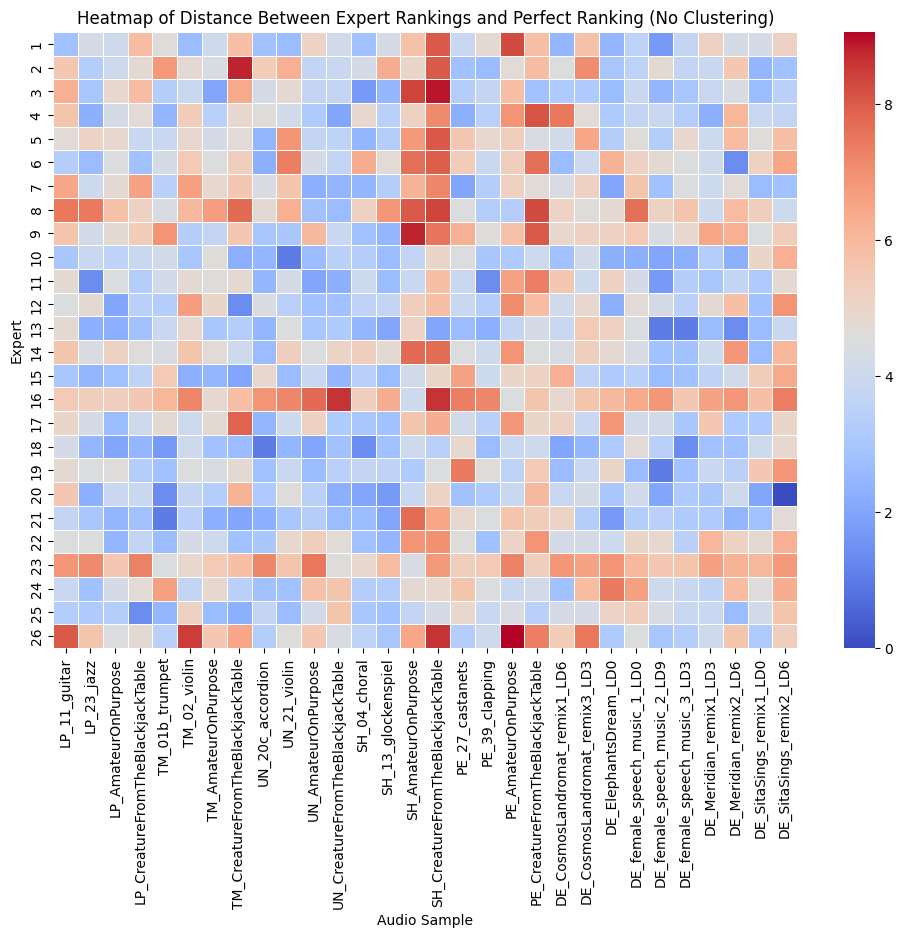

In [297]:
# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(distance_matrix_experts_df, cmap="coolwarm", annot=False, linewidths=0.5)

plt.xlabel("Audio Sample")
plt.ylabel("Expert")
plt.title("Heatmap of Distance Between Expert Rankings and Perfect Ranking (No Clustering)")

plt.show()

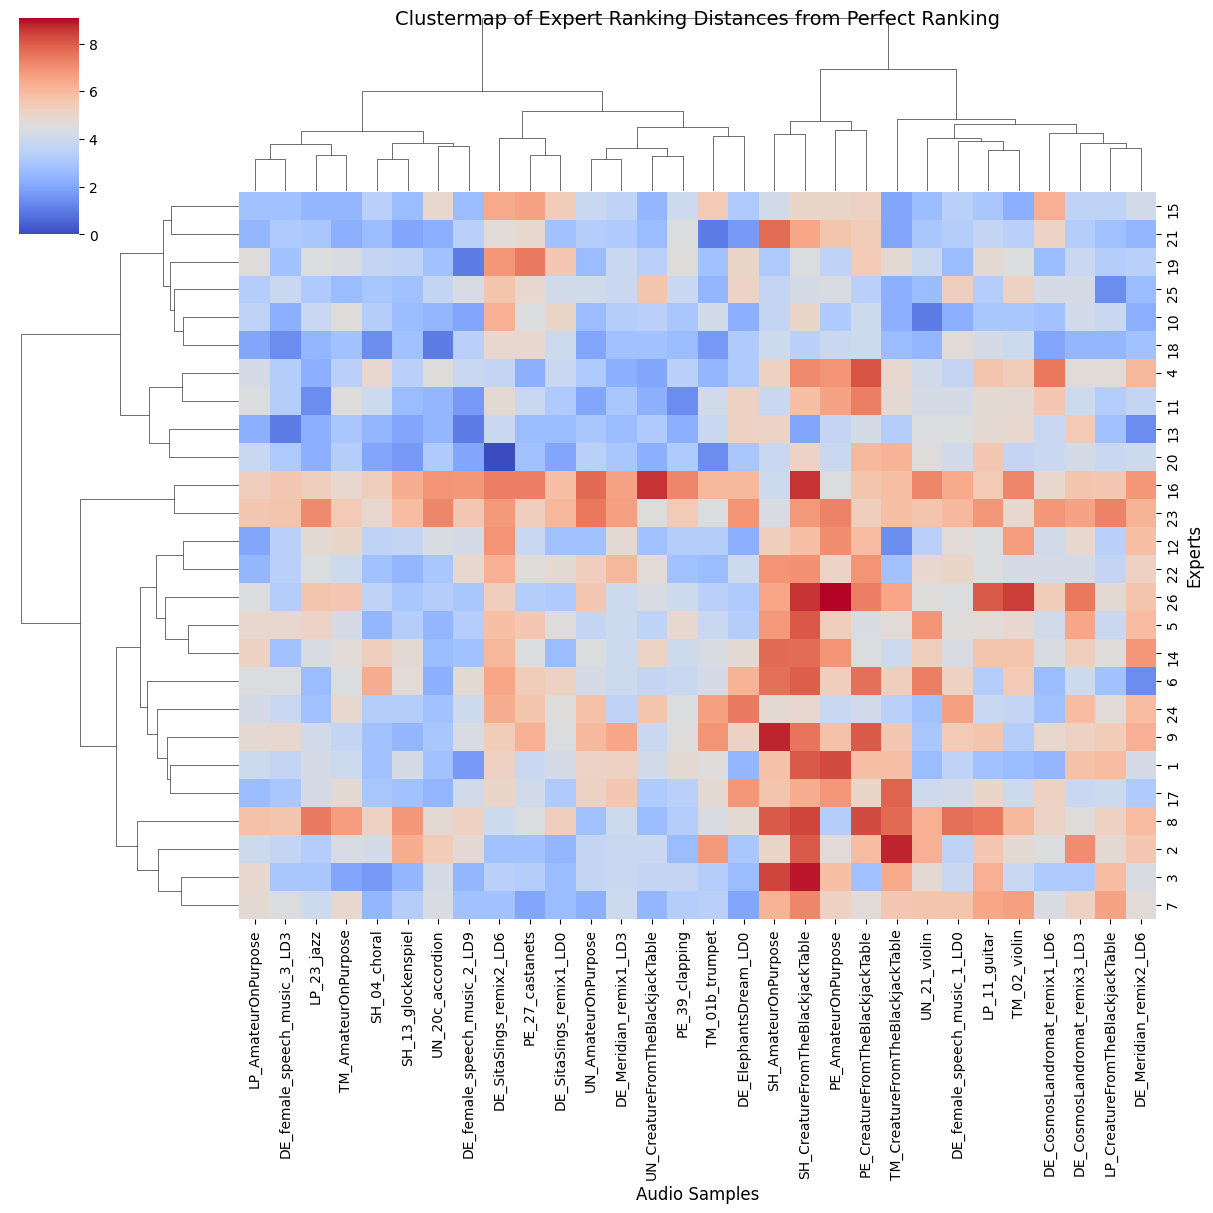

In [298]:
# Perform hierarchical clustering (using Ward's method)
linkage_matrix_experts = linkage(distance_matrix_experts, method='ward')

# Create a clustermap (heatmap with hierarchical clustering)
clustermap_experts = sns.clustermap(
    distance_matrix_experts_df,
    cmap="coolwarm",
    method="ward",
    figsize=(12, 12),
    xticklabels=True,  # Display column labels (optional)
    yticklabels=True   # Display row labels (optional)
)

# Add axis labels
clustermap_experts.ax_heatmap.set_xlabel("Audio Samples", fontsize=12)
clustermap_experts.ax_heatmap.set_ylabel("Experts", fontsize=12)
clustermap_experts.ax_heatmap.set_title("Clustermap of Expert Ranking Distances from Perfect Ranking", fontsize=14, pad=120)

# Show the plot
plt.show()

In [299]:
# PERFORMANCE-BASED CLUSTERING

# Extract clusters from the linkage matrix
num_clusters = 5  # Choose the number of clusters (you can adjust)
cluster_labels_experts = fcluster(linkage_matrix_experts, num_clusters, criterion='maxclust')

# Create a DataFrame mapping experts to their cluster
cluster_experts_df = pd.DataFrame({'Expert': [f"Expert {i}" for i in range(1, 27)], 
                           'Cluster': cluster_labels_experts})

cluster_experts_df

,Expert,Cluster
0,Expert 1,4
1,Expert 2,5
2,Expert 3,5
3,Expert 4,2
4,Expert 5,4
5,Expert 6,4
6,Expert 7,5
7,Expert 8,5
8,Expert 9,4
9,Expert 10,1


In [300]:
# order cluster_df by Cluster

cluster_experts_df_ordered = cluster_experts_df.sort_values(by='Cluster')

cluster_experts_df_ordered

,Expert,Cluster
20,Expert 21,1
18,Expert 19,1
17,Expert 18,1
9,Expert 10,1
24,Expert 25,1
14,Expert 15,1
12,Expert 13,2
3,Expert 4,2
19,Expert 20,2
10,Expert 11,2


In [301]:
# Example: Find which experts belong to Cluster 1
cluster_1_experts = cluster_experts_df[cluster_experts_df['Cluster'] == 1]
print(cluster_1_experts)

       Expert  Cluster
9   Expert 10        1
14  Expert 15        1
17  Expert 18        1
18  Expert 19        1
20  Expert 21        1
24  Expert 25        1


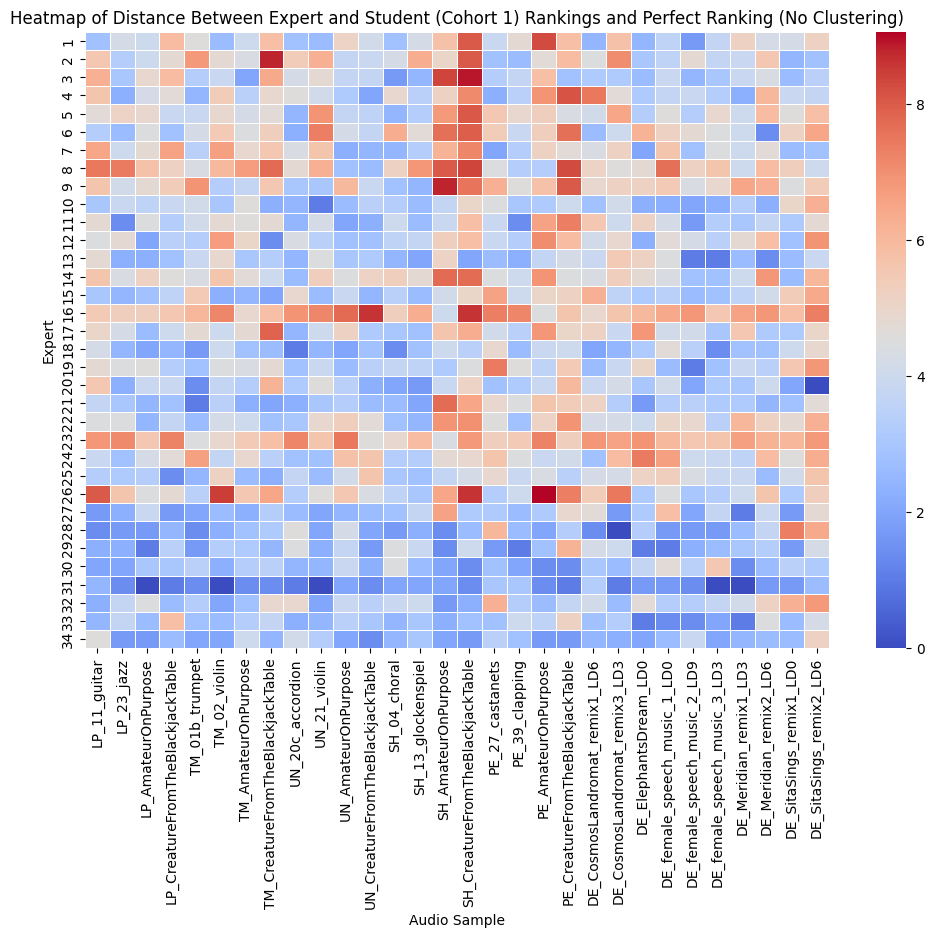

In [302]:
# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(distance_matrix_experts_BSU1_df, cmap="coolwarm", annot=False, linewidths=0.5)

plt.xlabel("Audio Sample")
plt.ylabel("Expert")
plt.title("Heatmap of Distance Between Expert and Student (Cohort 1) Rankings and Perfect Ranking (No Clustering)")

plt.show()

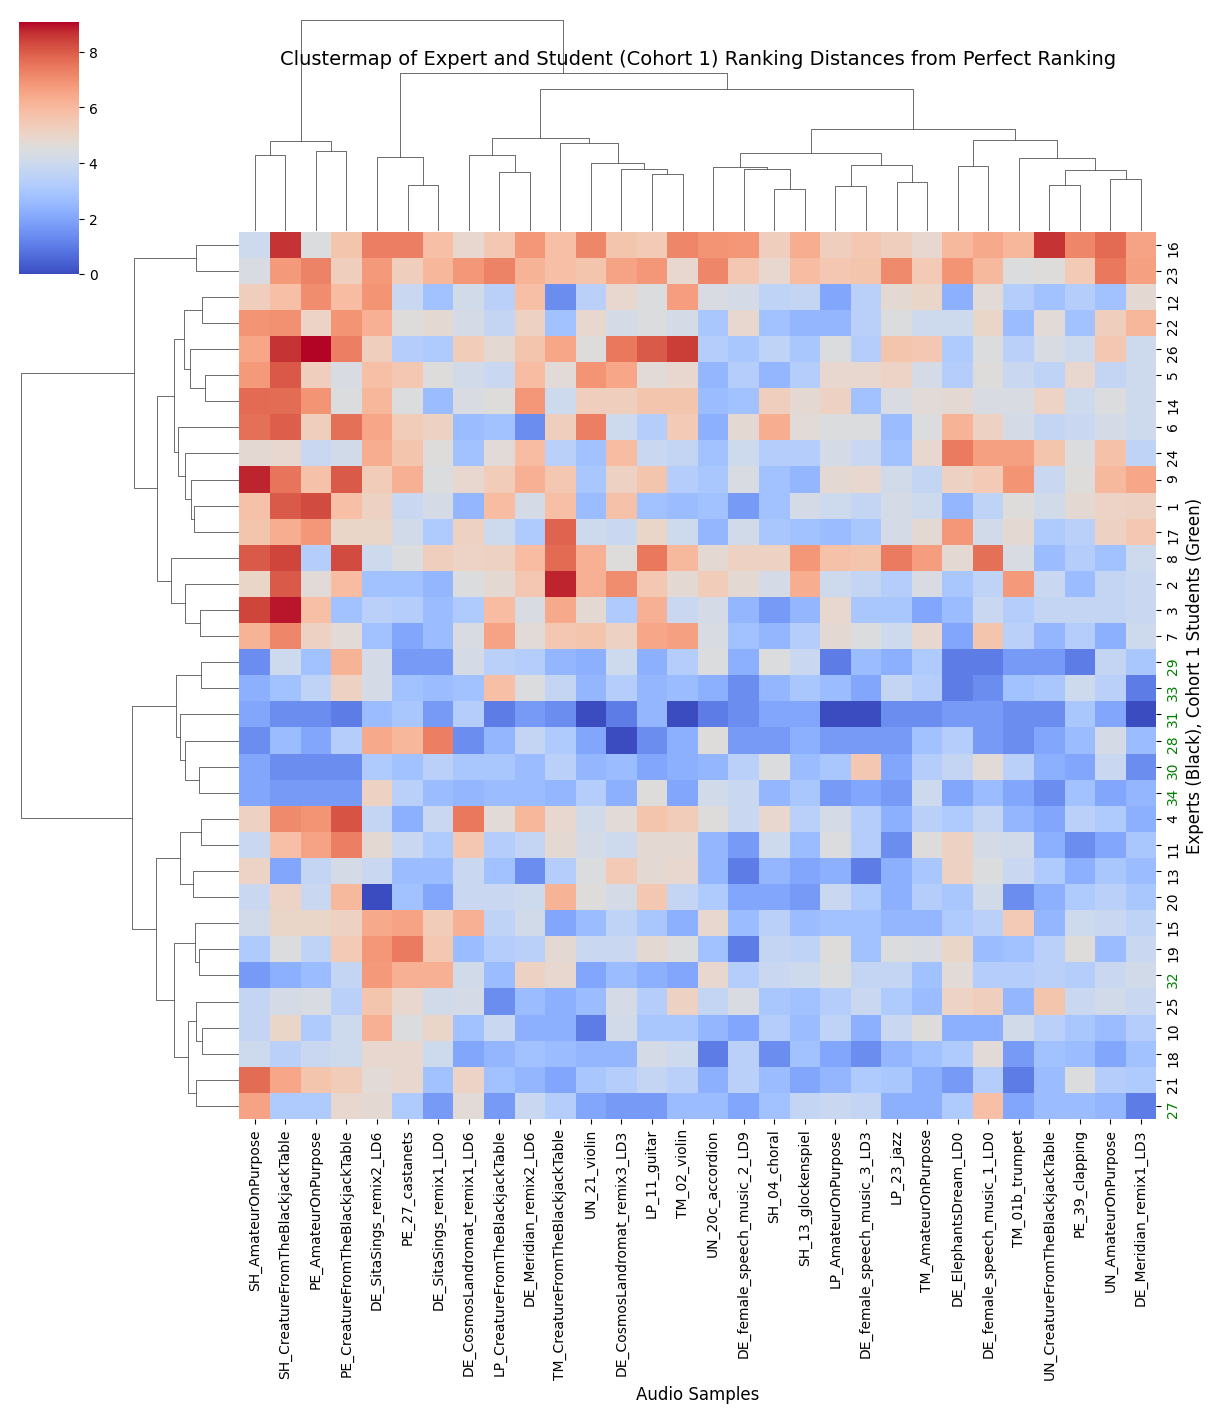

In [303]:
# Perform hierarchical clustering (using Ward's method)
linkage_matrix_experts_BSU1 = linkage(distance_matrix_experts_BSU1_df, method='ward')

# Create a clustermap (heatmap with hierarchical clustering)
clustermap_experts_BSU1 = sns.clustermap(
    distance_matrix_experts_BSU1_df,
    cmap="coolwarm",
    method="ward",
    figsize=(12, 14),
    xticklabels=True,  # Display column labels (optional)
    yticklabels=True   # Display row labels (optional)
)

# Add axis labels
clustermap_experts_BSU1.ax_heatmap.set_xlabel("Audio Samples", fontsize=12)
clustermap_experts_BSU1.ax_heatmap.set_ylabel("Experts (Black), Cohort 1 Students (Green)", fontsize=12)
clustermap_experts_BSU1.ax_heatmap.set_title("Clustermap of Expert and Student (Cohort 1) Ranking Distances from Perfect Ranking", fontsize=14, pad=120)

# Customize the row tick labels
for label in clustermap_experts_BSU1.ax_heatmap.get_yticklabels():
    text = label.get_text()
    if text.isdigit() and 27 <= int(text) <= 34:
        label.set_color('green')

plt.show()

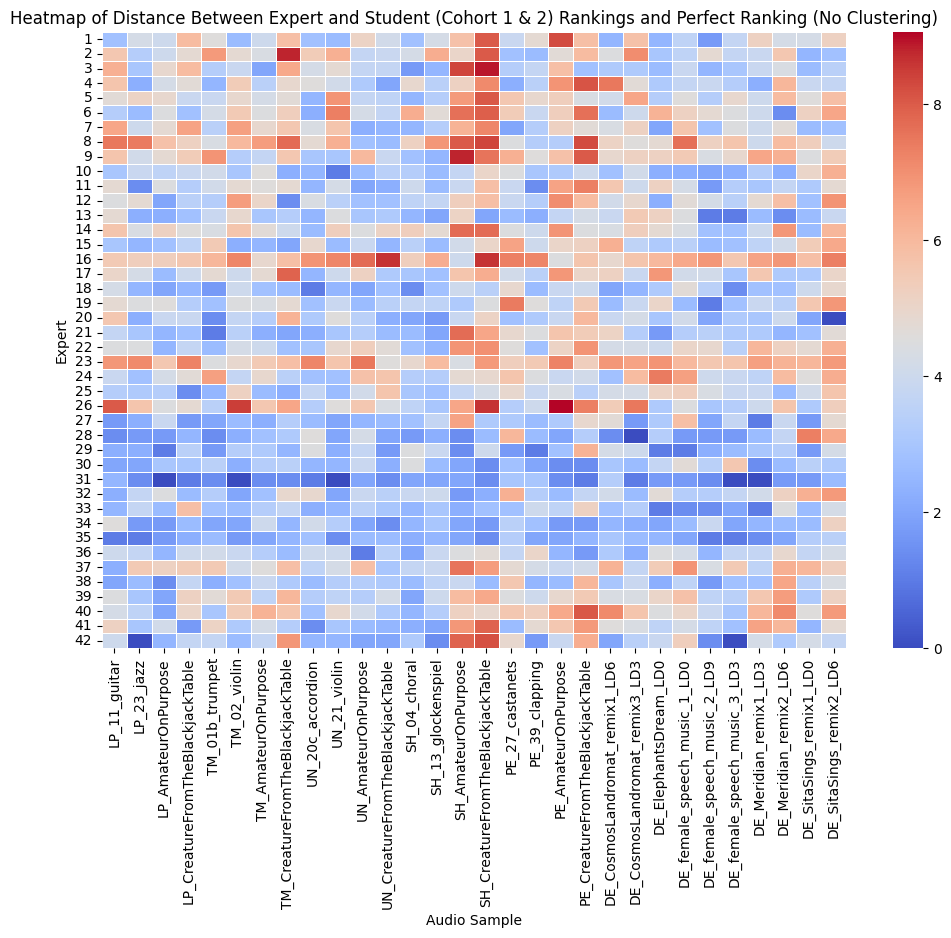

In [304]:
# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(distance_matrix_experts_BSU1_BSU2_df, cmap="coolwarm", annot=False, linewidths=0.5)

plt.xlabel("Audio Sample")
plt.ylabel("Expert")
plt.title("Heatmap of Distance Between Expert and Student (Cohort 1 & 2) Rankings and Perfect Ranking (No Clustering)")

plt.show()

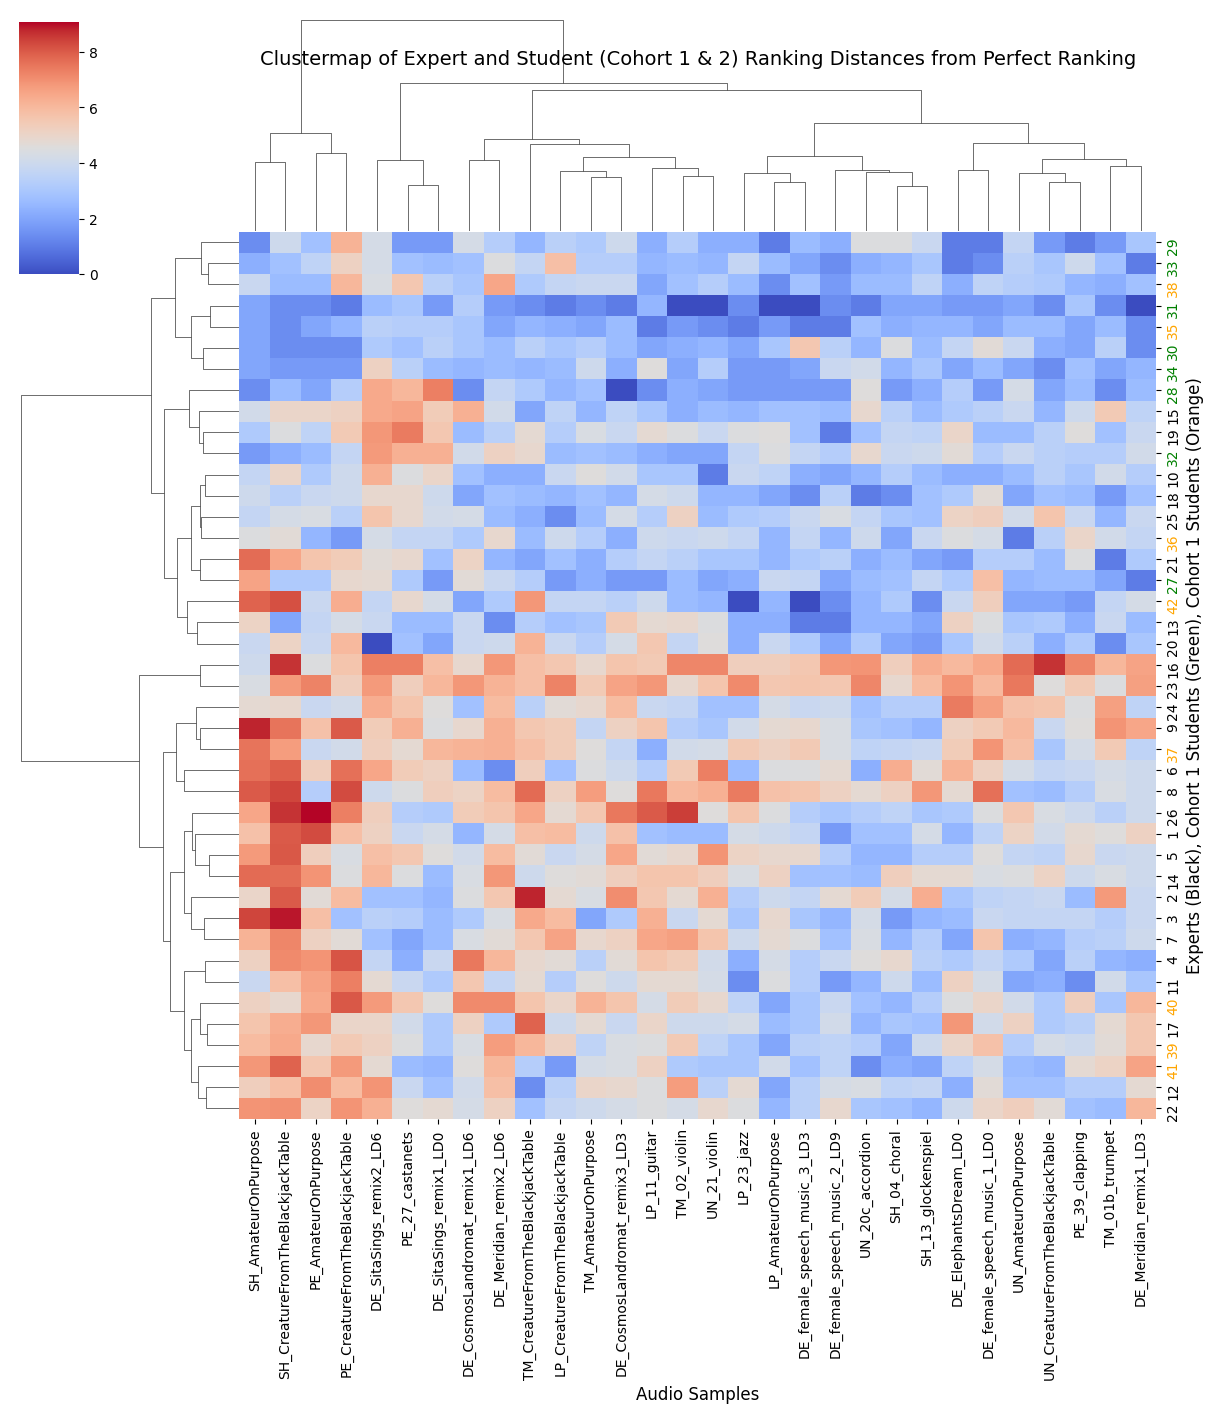

In [305]:
# Perform hierarchical clustering (using Ward's method)
linkage_matrix_experts_BSU1_BSU2 = linkage(distance_matrix_experts_BSU1_BSU2_df, method='ward')

# Create a clustermap (heatmap with hierarchical clustering)
clustermap_experts_BSU1_BSU2 = sns.clustermap(
    distance_matrix_experts_BSU1_BSU2_df,
    cmap="coolwarm",
    method="ward",
    figsize=(12, 14),
    xticklabels=True,  # Display column labels (optional)
    yticklabels=True   # Display row labels (optional)
)

# Add axis labels
clustermap_experts_BSU1_BSU2.ax_heatmap.set_xlabel("Audio Samples", fontsize=12)
clustermap_experts_BSU1_BSU2.ax_heatmap.set_ylabel("Experts (Black), Cohort 1 Students (Green), Cohort 1 Students (Orange)", fontsize=12)
clustermap_experts_BSU1_BSU2.ax_heatmap.set_title("Clustermap of Expert and Student (Cohort 1 & 2) Ranking Distances from Perfect Ranking", fontsize=14, pad=120)

# Customize the row tick labels
for label in clustermap_experts_BSU1_BSU2.ax_heatmap.get_yticklabels():
    text = label.get_text()
    if text.isdigit() and 27 <= int(text) <= 34:
        label.set_color('green')
    elif text.isdigit() and 35 <= int(text) <= 42:
        label.set_color('orange')

# Show the plot
plt.show()